# Exercise 2

A)

In [1]:
#importing extensions
import numpy as np
import matplotlib.pyplot as plt

# defining constants
m = 511 * 10**3 # unit: eV

# defining function
def f(E, theta):
    gamma = E/m
    beta = np.sqrt(1-gamma**-2)
    return ((2+(np.sin(theta)**2))/(1-beta**2*(np.cos(theta))**2))

The function f is not numerically stable. Plugging in very small values close to zero leads to f becoming non-continuous.
For E=50GeV the range for $\theta$ approximatly $[-10^{-7},10^{-7}]$.

The instabilty is a result of substraction of two very similar numbers in the denominator, since the second term
is very close to 1 for sufficiently large energies.

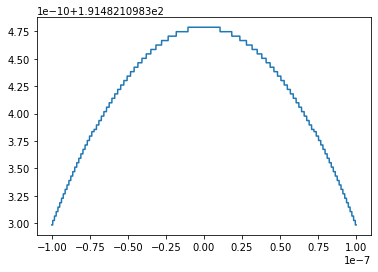

In [21]:
x = 10**-7
xx = np.linspace(-x,x,10000)
plt.plot(xx,f(50*10**5,xx))
plt.show()
plt.close()

B)
Substitution of $1-\sin(\theta)^2$ for $\cos(\theta)^2$ and using the giving relation $1-\beta^2=\gamma^{-2}$
results in f becoming numerically stable:
$\tilde{f}(\theta) = \frac{2+\sin(\theta)^2}{\gamma^{-2}-\beta^2\sin(\theta)^2}$.

In [22]:
def g(E,theta):
    gamma = E/m
    beta = np.sqrt(1-gamma**-2)
    return ((2+(np.sin(theta)**2))/(gamma**-2+(1-gamma**-2)*(np.sin(theta))**2))

C) The following plot clearly shows that the non-continuous behaviour of $f(\theta)$ (blue) has been fixed
with $\tilde{f(\theta)}$ (yellow).

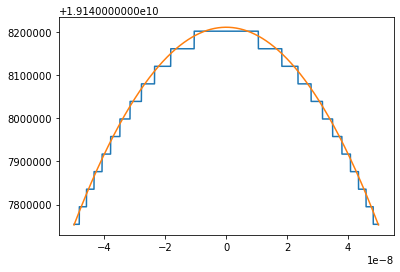

In [23]:
x = 0.5*10**-7
xx = np.linspace(-x,x,10000)
plt.plot(xx,f(50*10**9,xx))
plt.plot(xx,g(50*10**9,xx))
plt.show()
plt.close()

Using the definition for the condition number $K=\left|x\frac{f'(x)}{f(x)}\right|$, we know
that $K$ depends on $\theta$ via $K(\theta)=\left|\theta\frac{f'(\theta)}{f(\theta)}\right|$.

The following plot shows the value of $K(\theta)$ for $0\leq\theta\leq\pi$.


D)

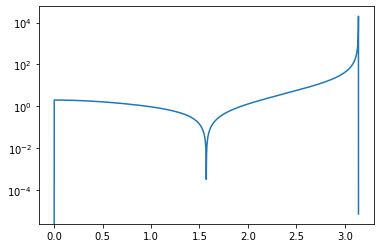

In [2]:
xx = np.linspace(0,np.pi,10000)

def gamma(E):
    return E/511000
def beta2(E):
    return 1-(1/gamma(E)**2)
def obenf(E,theta):
    return 2*np.sin(theta)*np.cos(theta)*(1-beta2(E)*np.cos(theta)**2)-(2+np.sin(theta)**2)*(beta2(E))*2*np.cos(theta)*np.sin(theta)
def untenf(E,theta):
    return (1-beta2(E)*np.cos(theta)**2)*(2+np.sin(theta)**2)
def K(E,theta):
    return np.abs(theta*obenf(E,theta)/untenf(E,theta))


plt.plot(xx,K(50*10**9,xx))
plt.yscale('log')
plt.show()
plt.close()

The problem is poorly conditioned for all $\theta$ close to $\pi$, here $K$ has a value
much greater than 1.

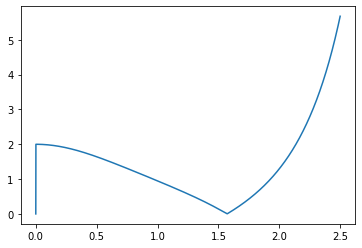

In [25]:
xx = np.linspace(0,2.5,10000)
plt.plot(xx,K(50*10**9,xx))
plt.show()
plt.close()

The condition number is acceptably low for values smaller than approximately $\pi-1$.

E)
Condition is a property of the problem itself, it describes how small changes of the input affect the output.
Stability on the other hand is an attribute of the algorythm and tracks how small errors of the input affect the output.